# Intro to keras as part of Tensorflow
    - Load MNIST dataset
    - Linear model
    - Neural model
    - Convolutional model

In [1]:
from __future__ import print_function

#Basic libraries
import numpy as np
import tensorflow as tf
print('Tensorflow version: ', tf.__version__)
import time

#Show images
import matplotlib.pyplot as plt
%matplotlib inline
# plt configuration
plt.rcParams['figure.figsize'] = (10, 10)        # size of images
plt.rcParams['image.interpolation'] = 'nearest'  # show exact image
plt.rcParams['image.cmap'] = 'gray'  # use grayscale 


Tensorflow version:  2.3.0


In [2]:
# Select GPU
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5106494433995153464
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4584984979119636489
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10892685715333265918
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11146783616
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3782086203768153616
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


## Get some data

In [3]:
# Import mnist dataset and rescale between [0,1]

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('X train shape: ',X_train.shape)
print('y train shape: ',y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X train shape:  (60000, 28, 28)
y train shape:  (60000,)
X test shape:  (10000, 28, 28)
y test shape:  (10000,)


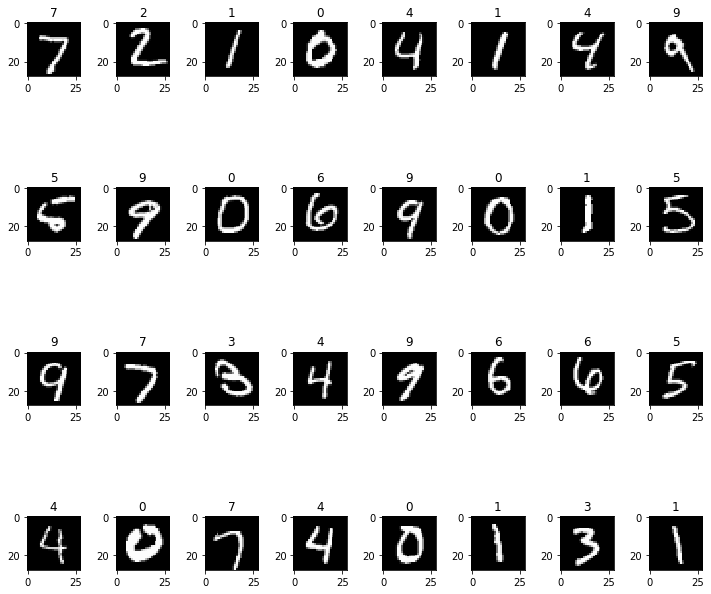

In [4]:
#Examine the data
plt.rcParams['figure.figsize'] = (10, 10)

fig = plt.figure()
for n, i in enumerate(range(32)): 
    a = fig.add_subplot(4,8,n+1)
    a.set_title(str(y_test[i]))
    fig.tight_layout()
    plt.imshow(X_test[i])
    

## Linear model

In [5]:
print('Linear model...')
images = tf.keras.layers.Input(batch_shape=(None, 28, 28), dtype='float32', name='Images') 
flat = tf.keras.layers.Flatten(name='Flat_image')(images)
output = tf.keras.layers.Dense(10, activation='softmax', name='Dense_output')(flat)

# Model Architecture defined
model_linear = tf.keras.models.Model(inputs=images, outputs=output)
model_linear.summary()


Linear model...
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Images (InputLayer)          [(None, 28, 28)]          0         
_________________________________________________________________
Flat_image (Flatten)         (None, 784)               0         
_________________________________________________________________
Dense_output (Dense)         (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Select optimizer and compile model
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)
model_linear.compile(loss='sparse_categorical_crossentropy', 
                     optimizer=sgd_optimizer, metrics=['accuracy'])

In [7]:
# Train the model
start = time.time()

tb_callback_ln = tf.keras.callbacks.TensorBoard(log_dir='../data/tensorboard/keras/linear/')

history_linear = model_linear.fit(X_train, y_train, batch_size=128, epochs=50,
                                  verbose=1, validation_data=(X_test, y_test), callbacks=[tb_callback_ln])

print('Seconds to train: ', time.time() - start)

Epoch 1/50
  1/469 [..............................] - ETA: 0s - loss: 2.4289 - accuracy: 0.0312WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
469/469 [==============================] - 2s 4ms/step - loss: 1.2761 - accuracy: 0.7049 - val_loss: 0.8086 - val_accuracy: 0.8397
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: 0.7114 - accuracy: 0.8445 - val_loss: 0.6063 - val_accuracy: 0.8619
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: 0.5839 - accuracy: 0.8604 - val_loss: 0.5254 - val_accuracy: 0.8729
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.5227 - accuracy: 0.8697 - val_loss: 0.4799 - val_accuracy: 0.8804
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - lo

In [ ]:
history_linear.history

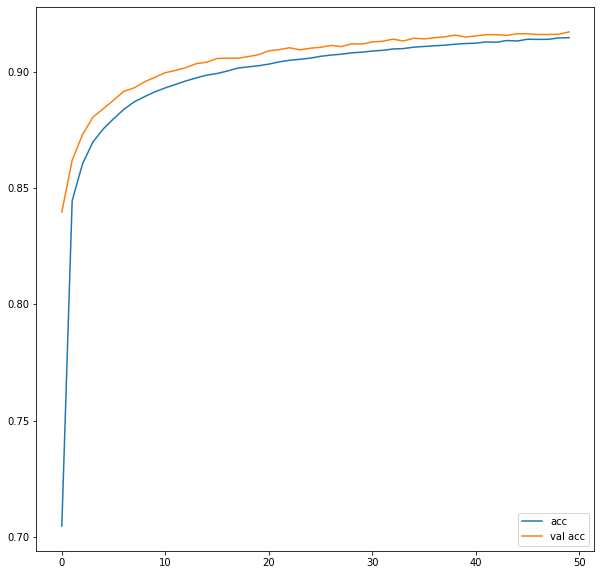

In [10]:
plt.rcParams['figure.figsize'] = (10, 10)

plt.plot(history_linear.history['accuracy'], label='acc')
plt.plot(history_linear.history['val_accuracy'], label='val acc')
plt.legend(loc='lower right')
plt.show()

In [11]:
# Score and select prediction with max prob
import numpy as np
p_test = model_linear.predict(X_test)
pred_test = np.argmax(p_test, axis=1)

#Evaluate the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_test))

[[ 957    0    2    2    0    6    9    1    3    0]
 [   0 1105    2    2    1    3    4    1   17    0]
 [   8    7  907   16   14    2   15   17   40    6]
 [   3    0   21  917    0   26    2   10   20   11]
 [   1    1    5    1  912    1   12    2    8   39]
 [  10    3    7   36   11  768   15    6   30    6]
 [  15    3    3    2   11   13  908    1    2    0]
 [   3   12   21    8    7    0    0  937    3   37]
 [   6    8    7   24    9   25   13   13  859   10]
 [  11    7    3   11   36    9    0   26    6  900]]


## Neural network model 

In [12]:
print('NN model...')

images = tf.keras.layers.Input(batch_shape=(None, 28, 28), dtype='float32', name='Images') 
flat   = tf.keras.layers.Flatten(name='Flat_image')(images)
dense  = tf.keras.layers.Dense(500, activation='relu', name='Dense_layer')(flat)
output = tf.keras.layers.Dense(10, activation='softmax', name='Dense_output')(dense)

# Model Architecture defined
model_nn = tf.keras.models.Model(inputs=images, outputs=output)
model_nn.summary()


NN model...
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Images (InputLayer)          [(None, 28, 28)]          0         
_________________________________________________________________
Flat_image (Flatten)         (None, 784)               0         
_________________________________________________________________
Dense_layer (Dense)          (None, 500)               392500    
_________________________________________________________________
Dense_output (Dense)         (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)
model_nn.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=sgd_optimizer, metrics=['accuracy'])


In [14]:
# Train the model
start = time.time()

tb_callback_nn = tf.keras.callbacks.TensorBoard(log_dir='../data/tensorboard/keras/neural/')

history_nn = model_nn.fit(X_train, y_train, batch_size=128, epochs=50,
                    verbose=1, validation_data=(X_test, y_test), callbacks=[tb_callback_nn])

print('Seconds to train: ', time.time() - start)

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 1.0894 - accuracy: 0.7576 - val_loss: 0.5886 - val_accuracy: 0.8699
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.5157 - accuracy: 0.8745 - val_loss: 0.4277 - val_accuracy: 0.8937
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4168 - accuracy: 0.8922 - val_loss: 0.3681 - val_accuracy: 0.9028
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3715 - accuracy: 0.9002 - val_loss: 0.3374 - val_accuracy: 0.9076
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3437 - accuracy: 0.9059 - val_loss: 0.3165 - val_accuracy: 0.9123
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3240 - accuracy: 0.9105 - val_loss: 0.3001 - val_accuracy: 0.9164
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3084 - accuracy: 0.9147 - val_loss: 0.2881 - val_accuracy: 0.9213
Epoch 

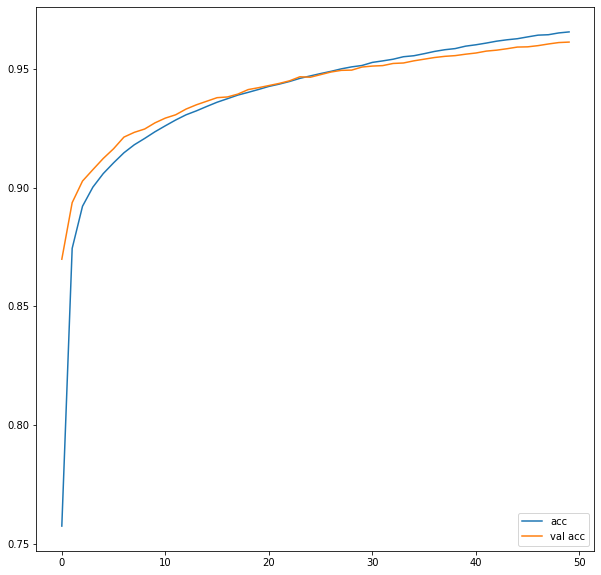

In [16]:
# Plot train vs valid
plt.rcParams['figure.figsize'] = (10, 10)

plt.plot(history_nn.history['accuracy'], label='acc')
plt.plot(history_nn.history['val_accuracy'], label='val acc')
plt.legend(loc='lower right')
plt.show()

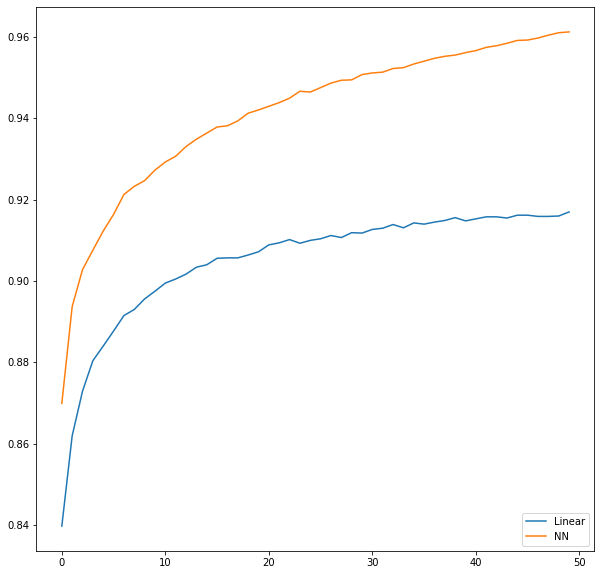

In [17]:
# Compare the two models
plt.rcParams['figure.figsize'] = (10, 10)

plt.plot(history_linear.history['val_accuracy'], label='Linear')
plt.plot(history_nn.history['val_accuracy'], label='NN')
plt.legend(loc='lower right')
plt.show()

## Convolutional model

In [18]:
#Define the model
print('Convolutional model...')
print('LeNet architecture.')

#Inputs
images = tf.keras.layers.Input(batch_shape=(None, 28, 28, 1), dtype='float32', name='Images')

#First convolutional layer
conv1 = tf.keras.layers.Conv2D(20, (5,5))(images)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

#Second convolutional layer
conv2 = tf.keras.layers.Conv2D(20, (5,5))(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

#Flatten convolution output
flat = tf.keras.layers.Flatten(name='Flat_image')(pool2)

# First dense layer
dense1 = tf.keras.layers.Dense(500, activation='relu', name='Dense_1')(flat)

# Second dense layer
output = tf.keras.layers.Dense(10, activation='softmax', name='Dense_output')(dense1)

# Model Architecture defined
model_conv = tf.keras.models.Model(inputs=images, outputs=output)
model_conv.summary()


Convolutional model...
LeNet architecture.
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Images (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          10020     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
Flat_image (Flatten)         (None, 320)               0         
_________________________________________________________________
Dense_1 (De

In [19]:
# Compile model and select optimizer
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)
model_conv.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])


In [20]:
# Train the model
X_train_img = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test_img = X_test.reshape(X_test.shape[0], 28, 28, 1)

start = time.time()

tb_callback_cnn = tf.keras.callbacks.TensorBoard(log_dir='../data/tensorboard/keras/CNN/')

history = model_conv.fit(X_train_img, y_train, batch_size=128, epochs=10,
                    verbose=1, validation_data=(X_test_img, y_test), callbacks=[tb_callback_cnn])

print('Seconds to train: ', time.time() - start)

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.9112 - accuracy: 0.7528 - val_loss: 0.3230 - val_accuracy: 0.9026
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2922 - accuracy: 0.9126 - val_loss: 0.2372 - val_accuracy: 0.9297
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2172 - accuracy: 0.9349 - val_loss: 0.2099 - val_accuracy: 0.9364
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1746 - accuracy: 0.9481 - val_loss: 0.1414 - val_accuracy: 0.9588
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1459 - accuracy: 0.9568 - val_loss: 0.1194 - val_accuracy: 0.9651
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1257 - accuracy: 0.9628 - val_loss: 0.1429 - val_accuracy: 0.9534
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1117 - accuracy: 0.9665 - val_loss: 0.1067 - val_accuracy: 0.9678
Epoch 

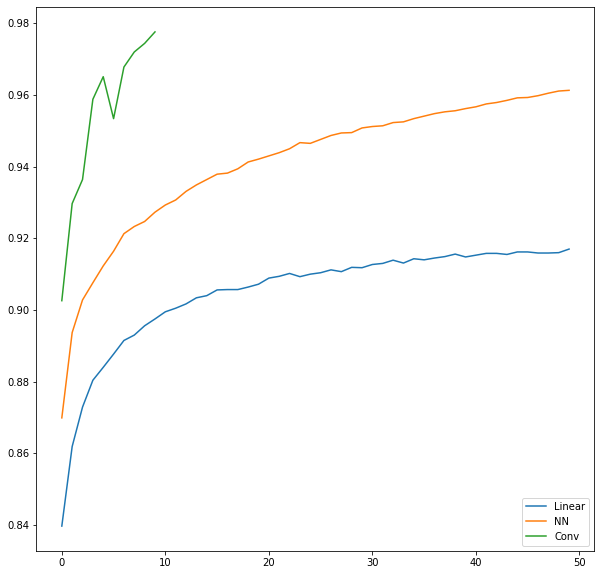

In [21]:
#Compare with previous
plt.rcParams['figure.figsize'] = (10, 10)

plt.plot(history_linear.history['val_accuracy'], label='Linear')
plt.plot(history_nn.history['val_accuracy'], label='NN')
plt.plot(history.history['val_accuracy'], label='Conv')
plt.legend(loc='lower right')
plt.show()


In [22]:
# Score and select prediction with max prob
import numpy as np
p_test = model_conv.predict(X_test_img)
pred_test = np.argmax(p_test, axis=1)

#Evaluate the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_test))

[[ 972    0    0    0    0    3    1    2    2    0]
 [   0 1125    3    1    0    0    2    1    3    0]
 [   4    3 1010    2    2    0    1    7    3    0]
 [   1    0    2  986    0    5    0    5    4    7]
 [   1    0    2    0  964    0    2    1    2   10]
 [   2    1    0    8    0  870    3    1    4    3]
 [   8    3    0    1    3    6  936    0    1    0]
 [   0    6   13    3    1    0    0  990    2   13]
 [   4    0    1    3    4    4    1    2  945   10]
 [   4    5    0    4   11    3    0    4    0  978]]


n:  1 - Pred 1: 2(0.877) - Pred 2: 4(0.111)
n:  2 - Pred 1: 0(0.954) - Pred 2: 6(0.033)
n:  3 - Pred 1: 7(0.860) - Pred 2: 2(0.112)
n:  4 - Pred 1: 3(0.783) - Pred 2: 5(0.203)
n:  5 - Pred 1: 0(0.964) - Pred 2: 6(0.031)
n:  6 - Pred 1: 5(0.873) - Pred 2: 3(0.127)
n:  7 - Pred 1: 0(0.868) - Pred 2: 2(0.088)
n:  8 - Pred 1: 2(0.839) - Pred 2: 8(0.137)
n:  9 - Pred 1: 1(0.711) - Pred 2: 8(0.092)
n: 10 - Pred 1: 3(0.390) - Pred 2: 2(0.312)
n: 11 - Pred 1: 9(0.916) - Pred 2: 4(0.083)
n: 12 - Pred 1: 8(0.915) - Pred 2: 5(0.030)
n: 13 - Pred 1: 9(0.900) - Pred 2: 4(0.097)
n: 14 - Pred 1: 2(0.739) - Pred 2: 7(0.251)
n: 15 - Pred 1: 5(0.509) - Pred 2: 3(0.444)
n: 16 - Pred 1: 9(0.973) - Pred 2: 8(0.026)
n: 17 - Pred 1: 0(0.939) - Pred 2: 6(0.055)
n: 18 - Pred 1: 5(0.813) - Pred 2: 9(0.076)
n: 19 - Pred 1: 1(0.728) - Pred 2: 7(0.073)
n: 20 - Pred 1: 4(0.614) - Pred 2: 8(0.337)
n: 21 - Pred 1: 6(0.987) - Pred 2: 4(0.010)
n: 22 - Pred 1: 8(0.633) - Pred 2: 3(0.359)
n: 23 - Pred 1: 9(0.534) - Pred 

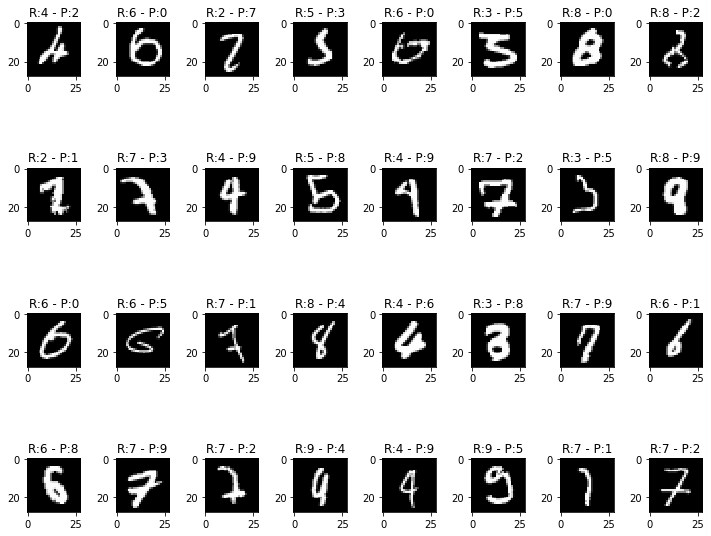

In [23]:

#Print probabilities to the first erros
test_errors=[]
test_errors_real=[]
test_errors_predict=[]
num_errors = 32
n = 0
for i in range(len(pred_test)):
    if pred_test[i] != y_test[i] and n < num_errors: #Error!
        n += 1
        test_errors += [X_test_img[i,:,:,0]]
        test_errors_real += [y_test[i]]
        test_errors_predict += [pred_test[i]]
        
        #Print first propabilities
        index = p_test[i].argsort()[::-1]
        print('n: %2i - Pred 1: %1i(%0.3f) - Pred 2: %1i(%0.3f)' % (n,
              index[0], p_test[i][index[0]], index[1], p_test[i][index[1]]))
        
print("Num errors: ", len(test_errors))


#Plot 32 images wrong classified.
plt.rcParams['figure.figsize'] = (10, 10)

fig = plt.figure()
for n, i in enumerate(range(32)): 
    a = fig.add_subplot(5, 8, n+1)
    a.set_title('R:'+str(test_errors_real[i])+' - P:'+str(test_errors_predict[i]))
    fig.tight_layout()
    plt.imshow(test_errors[i])
    

# Input batch example
    - Define a batch generator
    - Use it in the train process

In [24]:
# New model. Equal to the last.
model_conv2 = tf.keras.models.Model(inputs=images, outputs=output)

sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.99, decay=0.005, nesterov=True)
model_conv2.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])


In [25]:
# Define a generator to X_train. Same code to an HDF5 source
def batch_generator(X, y, batch_size=64):
    data_size = X.shape[0]
    while 1:
        # Randomize batches in each epoch
        batch_randomized = np.random.permutation(range(0, data_size-batch_size, batch_size))
        # Iterate over each batch
        for batch in batch_randomized:
            x_batch = X[batch : batch+batch_size]
            y_batch = y[batch : batch+batch_size]
            yield x_batch, y_batch

In [26]:
#Test the generator
seq = batch_generator(X_train_img, y_train)    
next_seq = next(seq)
print(next_seq[0][0].shape)
print(next_seq[1])


(28, 28, 1)
[6 1 2 7 2 1 7 1 2 0 4 3 7 4 8 2 5 6 2 4 2 7 3 4 8 2 3 7 6 4 3 2 9 9 2 2 5
 7 4 9 5 2 7 8 5 6 1 1 7 0 8 6 2 8 1 5 9 5 6 0 2 5 6 3]


In [27]:
# Train using the fit_generator function

# Number of steps to use all the train data in a epoch.
steps = X_train.shape[0]//64

history = model_conv2.fit_generator(batch_generator(X_train_img, y_train, batch_size=64),
                                    steps_per_epoch=steps, epochs=10,
                                    verbose=1, validation_data=(X_test_img, y_test))


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
937/937 [==============================] - 6s 6ms/step - loss: 0.1381 - accuracy: 0.9622 - val_loss: 0.0525 - val_accuracy: 0.9837
Epoch 2/10
937/937 [==============================] - 5s 6ms/step - loss: 0.0358 - accuracy: 0.9891 - val_loss: 0.0319 - val_accuracy: 0.9898
Epoch 3/10
937/937 [==============================] - 5s 6ms/step - loss: 0.0192 - accuracy: 0.9944 - val_loss: 0.0289 - val_accuracy: 0.9909
Epoch 4/10
937/937 [==============================] - 5s 6ms/step - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.0273 - val_accuracy: 0.9918
Epoch 5/10
937/937 [==============================] - 5s 6ms/step - loss: 0.0096 - accuracy: 0.9974 - val_loss: 0.0279 - val_accuracy: 0.9917
Epoch 6/10
937/937 [==============================] - 6s 6ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.0281 - val_accuracy: 0.9918
Epoch 7/10
937/937 [==============================] - 6s 6ms/step - loss